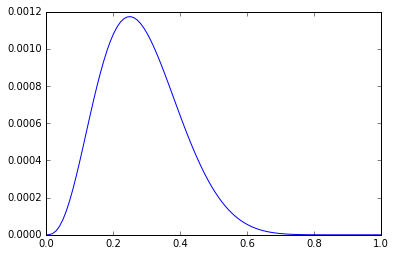

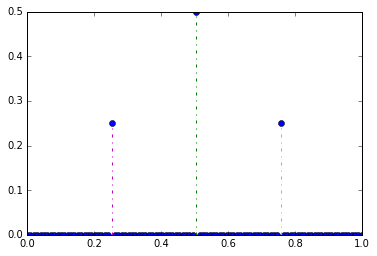

[ 0.71806439]
[ 0.28116588]
[ 0.00076974]


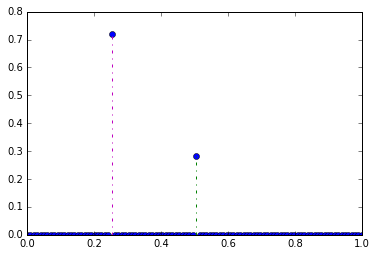

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl

def plot_exp(N, K):
    X = np.linspace(0, 1, 100)
    y = (X ** K) * ((1 - X) ** (N - K))
    plt.plot(X, y)
    plt.show()
    return y
    
def gen_prior():
    y = np.zeros((100, 1))
    y[25] = 0.25
    y[50] = 0.5
    y[75] = 0.25
    return y

def plot_prior():
    X = np.linspace(0, 1, 100)
    y = gen_prior()
    plt.stem(X, y, '-.')
    plt.show()

def plot_post(yp):
    X = np.linspace(0, 1, 100)
    plt.stem(X, yp, '-.')
    plt.show()
    
pdt = plot_exp(12, 3)
prior = gen_prior()
pd = pdt.dot(prior)

yp = np.zeros((100, 1))

def post(i, yp, pd):    
    yp[i] = prior[i] * (pdt[i] / pd)
    return yp[i]

plot_prior()
print (post(25, yp, pd))
print (post(50, yp, pd))
print (post(75, yp, pd))

plot_post(yp)


# print ('evidencia', pd)
# print ('sum pst', np.sum(yp))

0.79748367924


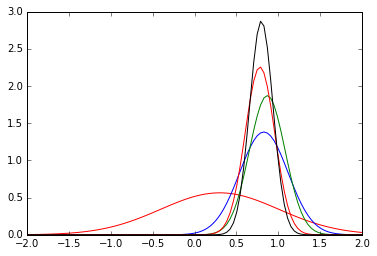

In [4]:
from scipy.stats import norm

from math import *

mu, sigma = 0.8, 0.1 # mean and standard deviation
M = 100
s = np.random.normal(mu, sqrt(sigma), M)


def plot_norm(mup, sigmap, c):
    x = np.linspace(-2, 2, 100)
    prior = norm.pdf(x, mup, sqrt(sigmap))
    plt.plot(x, prior, c)

    
# Estimation of mean with knonw variance
# Use a gaussian conjugate prior
def posterior(mu0, s20, s2, X, n):
    muml = np.sum(X[0 : n]) / n
    mun = (s2 * mu0 / (n * s20 + s2)) +  n * s20 * muml / (n * s20 + s2)
    sign = 1.0 / ((1.0 / s20) +  (n / s2))
    return mun, sign

mup = 0.3
sigmap = 0.5
plot_norm(mup, sigmap, 'r')
mun, sign = posterior(mup, sigmap, sigma, s, 1)
plot_norm(mun, sign, 'b')
mun, sign = posterior(mup, sigmap, sigma, s, 2)
plot_norm(mun, sign, 'g')
mun, sign = posterior(mup, sigmap, sigma, s, 3)
plot_norm(mun, sign, 'r')
mun, sign = posterior(mup, sigmap, sigma, s, 5)
print (mun)
plot_norm(mun, sign, 'k')

# plt.set_xlim([0.5, 1])
plt.show()

# print (s)

0.0998288293582


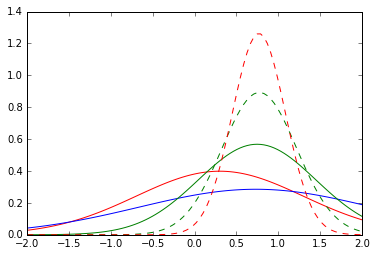

In [5]:

# Unknown mean and Unknown variance
# Use a normal-gamma distribution as conjugate prior
def post2(betha, mu0, a0, b0, X, n):
    muml = np.sum(X[0:n]) / n
    mun = (betha * mu0 + n * muml) / (betha + n)
    bethan = betha + n
    an = a0 + n * 0.5
    a = X - muml
    a = a ** 2
    a = np.sum(a)
    bn = b0 + 0.5  * (a) + betha * n * (muml - mu0) * (muml - mu0) / (2 * betha + n)
    return bethan, mun, an, bn
    
    
betha = 1
mu0 = 0.3
a0 = 0.1
b0 = 0.1
sig0 = b0 / a0


plot_norm(mu0, sig0, 'r')
bethan, mun, an, bn = post2(betha, mu0, a0, b0, s, 5)
sigman = bn / an
plot_norm(mun, sigman, 'b')
bethan, mun, an, bn = post2(betha, mu0, a0, b0, s, 20)
sigman = bn / an
plot_norm(mun, sigman, 'g')
bethan, mun, an, bn = post2(betha, mu0, a0, b0, s, 50)
sigman = bn / an
plot_norm(mun, sigman, 'g--')
bethan, mun, an, bn = post2(betha, mu0, a0, b0, s, 100)
sigman = bn / an
plot_norm(mun, sigman, 'r--')
print (sigman)